In [9]:
import pandas as pd
import os
import numpy as np

In [10]:
os.chdir('C:\\RESEARCH\\LUSC\\Stage')

In [11]:
genes=pd.read_excel('LUSC_Genes_Stage.xlsx',index_col=0)

In [12]:
flux=pd.read_excel('LUSC_Flux_Stage.xlsx',index_col=0)

In [13]:
genes.head(2)

,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,GGACT,...,SLFN12,SLFN13,SLFN14,SLFN5,SLFNL1,SLIT1,SLIT2,SLIT3,SLITRK1,Neoplasm Disease Stage American Joint Committee on Cancer Code3
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-18-3406-01,0.6275,-0.0763,-0.1111,-0.0210,-0.2073,-0.2939,6.0843,-0.1684,-0.1354,1.6552,...,0.3141,0.7349,-0.6499,1.8195,-0.9816,-0.1401,-0.5147,-0.5814,-0.2205,Stage IA
TCGA-18-3407-01,-0.8280,-0.0763,-0.1111,-0.2912,-0.2073,-0.2723,-0.7020,0.3242,-0.1354,0.4132,...,0.0783,-0.4010,-0.1467,1.5143,-0.1113,-0.2146,-0.3133,-0.4178,-0.2303,Stage IB


In [14]:
del genes['Neoplasm Disease Stage American Joint Committee on Cancer Code3']

In [15]:
genes.shape

(501, 14837)

In [16]:
flux.shape

(501, 2051)

In [17]:
g_c=genes.merge(flux,left_index=True,right_index=True)

In [18]:
g_c.shape

(501, 16888)

In [19]:
dt=g_c

In [20]:
dt.head(2)

,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,GGACT,...,'13HTACRitr','1513TACRitr','1531TACRitr','DEOXFVSitx','FVSitx','TACRitr','13DMTitr','15DMTitr','31DMTitr',Neoplasm Disease Stage American Joint Committee on Cancer Code3
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-18-3406-01,0.6275,-0.0763,-0.1111,-0.0210,-0.2073,-0.2939,6.0843,-0.1684,-0.1354,1.6552,...,23.456765,23.456765,23.456765,-315.830928,315.830928,41.782363,-9.529311,-9.529311,-9.529311,Stage IA
TCGA-18-3407-01,-0.8280,-0.0763,-0.1111,-0.2912,-0.2073,-0.2723,-0.7020,0.3242,-0.1354,0.4132,...,18.649305,18.649305,18.649305,-262.245016,262.245016,33.219075,-7.576280,-7.576280,-7.576280,Stage IB


In [21]:
X=dt.iloc[:,0:16886].values
y=dt.iloc[:,-1].values

In [22]:
y

array(['Stage IA', 'Stage IB', 'Stage IB', 'Stage IA', 'Stage IIB',
       'Stage IIIA', 'Stage IB', 'Stage IV', 'Stage IB', 'Stage IIB',
       'Stage IV', 'Stage IIB', 'Stage IB', 'Stage IIB', 'Stage IB',
       'Stage IA', 'Stage IIB', 'Stage IB', 'Stage IIIA', 'Stage IB',
       'Stage IB', 'Stage IIB', 'Stage IB', 'Stage IIB', 'Stage IB',
       'Stage IIIA', 'Stage IB', 'Stage IIB', 'Stage IB', 'Stage IA',
       'Stage IB', 'Stage IB', 'Stage IB', 'Stage IB', 'Stage IIIA',
       'Stage IA', 'Stage IIA', 'Stage IB', 'Stage IB', 'Stage IA',
       'Stage IA', 'Stage IB', 'Stage IB', 'Stage IB', 'Stage IA',
       'Stage IIIA', 'Stage IIA', 'Stage IIIA', 'Stage IIIA', 'Stage IB',
       'Stage IB', 'Stage IIIA', 'Stage IIA', 'Stage IB', 'Stage IB',
       'Stage IA', 'Stage IA', 'Stage IB', 'Stage IB', 'Stage IB',
       'Stage IB', 'Stage IA', 'Stage IB', 'Stage IB', 'Stage IA',
       'Stage IIB', 'Stage IB', 'Stage IIA', 'Stage IA', 'Stage IA',
       'Stage IA', 'Stage IIIA', 

In [23]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [24]:
y

array([1, 2, 2, 1, 5, 7, 2, 9, 2, 5, 9, 5, 2, 5, 2, 1, 5, 2, 7, 2, 2, 5,
       2, 5, 2, 7, 2, 5, 2, 1, 2, 2, 2, 2, 7, 1, 4, 2, 2, 1, 1, 2, 2, 2,
       1, 7, 4, 7, 7, 2, 2, 7, 4, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 5,
       2, 4, 1, 1, 1, 7, 4, 2, 2, 7, 2, 2, 1, 1, 7, 2, 5, 7, 7, 2, 4, 1,
       2, 1, 5, 2, 1, 5, 1, 2, 1, 4, 1, 5, 7, 5, 2, 1, 5, 2, 3, 7, 9, 4,
       5, 7, 2, 2, 1, 1, 9, 7, 2, 1, 7, 5, 3, 8, 1, 4, 2, 2, 2, 7, 2, 7,
       7, 7, 1, 5, 1, 2, 4, 4, 7, 7, 1, 7, 2, 2, 4, 4, 2, 5, 2, 2, 5, 1,
       1, 1, 4, 1, 1, 4, 5, 1, 7, 1, 1, 1, 7, 2, 5, 5, 2, 8, 5, 0, 1, 2,
       5, 2, 2, 2, 1, 1, 2, 4, 2, 2, 7, 7, 2, 2, 4, 2, 5, 4, 4, 2, 5, 1,
       2, 5, 5, 1, 5, 2, 2, 2, 5, 7, 1, 1, 4, 7, 4, 4, 2, 1, 2, 1, 2, 4,
       9, 4, 2, 4, 7, 2, 2, 5, 7, 7, 5, 2, 2, 4, 4, 5, 5, 5, 1, 2, 5, 2,
       4, 2, 5, 2, 5, 1, 5, 2, 2, 2, 5, 2, 7, 2, 4, 2, 5, 4, 1, 1, 1, 4,
       5, 2, 2, 1, 7, 5, 2, 5, 5, 5, 2, 2, 5, 5, 4, 2, 1, 2, 2, 5, 9, 5,
       2, 7, 2, 8, 1, 2, 7, 2, 2, 7, 8, 5, 8, 2, 5,

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [27]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [31]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6]+cm[7][7]+cm[8][8]) / cm.sum())
accuracy

0.175

Confusion Matrix, without normalization
[[0 0 1 0 0 0 0 0 0]
 [0 3 7 1 1 0 0 0 0]
 [0 6 9 2 4 0 1 1 0]
 [0 2 7 1 0 0 1 0 0]
 [0 4 9 1 1 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 2 4 2 3 0 0 0 0]
 [0 2 0 0 1 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]]


<Figure size 720x504 with 0 Axes>

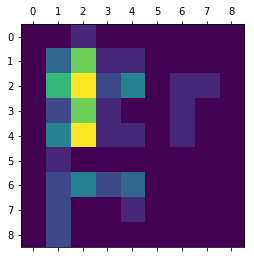

In [32]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.25       0.58333333 0.08333333 0.08333333 0.
  0.         0.         0.        ]
 [0.         0.26086957 0.39130435 0.08695652 0.17391304 0.
  0.04347826 0.04347826 0.        ]
 [0.         0.18181818 0.63636364 0.09090909 0.         0.
  0.09090909 0.         0.        ]
 [0.         0.25       0.5625     0.0625     0.0625     0.
  0.0625     0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.18181818 0.36363636 0.18181818 0.27272727 0.
  0.         0.         0.        ]
 [0.         0.66666667 0.         0.         0.33333333 0.
  0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.        ]]


<Figure size 432x288 with 0 Axes>

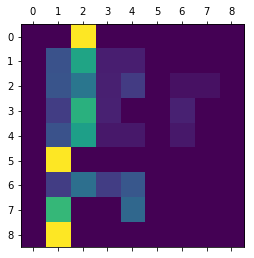

In [33]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [34]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.14      0.25      0.18        12
           2       0.24      0.39      0.30        23
           4       0.14      0.09      0.11        11
           5       0.10      0.06      0.08        16
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

   micro avg       0.17      0.17      0.17        80
   macro avg       0.07      0.09      0.07        80
weighted avg       0.13      0.17      0.14        80



C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

-0.05602939992031752

In [36]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.27320401885768636

In [ ]:

"""
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [1, 10, 100, 1000], 'kernel' : ['linear']},
              {'C' : [1, 10, 100, 1000], 'kernel' : ['rbf'], 'gamma' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_"""

In [ ]:
###########Testing set################

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)

In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)